# Lab for 1.1 & 1.2

### Install packages

In [ ]:
!conda install pandas -y
!conda install numpy -y
!conda install matplotlib -y
!conda install seaborn -y


### Import packages

In [1]:
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as random
import pandas as pd

### Randomly generate data

In [2]:
x = np.random.rand(300)
y = np.random.randn(300)
w = np.random.rand(300)
k = np.random.random(300)
t = np.random.randint(4, 10, size=300, dtype=int)
z = ['AL','GA', 'KT']*100
l = ['Male', 'Female', 'Female','Female', 'Male']*60
b = ['Junior', 'Senior','Freshman']*100


### Put the data in a dataframe using pandas

In [3]:
df = pd.DataFrame({'Ratio1': x, 'Ratio2':y, 'Cities':z, 'Weight':w, 'Sex': l,
                  'Size': k, 'Class' :b, 'Final': t}
                  , columns = ['Ratio1','Ratio2', 'Cities', 'Weight','Sex','Size','Class', 'Final'])
df.head(5)
#sn.scatterplot('A', 'B', data = df)

,Ratio1,Ratio2,Cities,Weight,Sex,Size,Class,Final
0,0.808473,-0.482639,AL,0.962445,Male,0.961190,Junior,7
1,0.992068,-0.239578,GA,0.838632,Female,0.287350,Senior,7
2,0.378830,-1.285383,KT,0.978259,Female,0.891156,Freshman,9
3,0.328422,-0.129478,AL,0.878920,Female,0.686765,Junior,7
4,0.004801,0.657913,GA,0.218526,Male,0.395559,Senior,9


### Summary Statistics (5 number summary)

In [48]:
df.describe()

,Ratio1,Ratio2,Weight,Size,Final
count,300.000000,300.000000,300.000000,300.000000,300.000000
mean,0.507116,-0.095387,0.530289,0.506144,6.506667
std,0.289189,1.027752,0.280857,0.281386,1.708709
min,0.002128,-2.675690,0.000755,0.000527,4.000000
25%,0.264305,-0.800108,0.297476,0.267008,5.000000
50%,0.507161,-0.107330,0.541641,0.492524,7.000000
75%,0.748377,0.521208,0.779404,0.763217,8.000000
max,0.998703,3.625908,0.995633,0.995442,9.000000


In [61]:
vr = ['Sex', 'Class', 'Cities']
df[vr].describe()

,Sex,Class,Cities
count,300,300,300
unique,2,3,3
top,Female,Junior,AL
freq,180,100,100


In [58]:
pd.crosstab(index = df['Cities'], columns = 'count').sort_values(['count'], ascending =False)

col_0,count
Cities,
AL,100
GA,100
KT,100


### Trimmed Mean

In [106]:
X = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 85,23,45,23,67,33,12,34,56, 20]
X1 = np.sort(X)
trimmed_X = X1[3:16]
print(np.mean(X))
np.mean(trimmed_X)

36.15


24.142857142857142

### Median

In [107]:
X = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 85,23,45,23,67,33,12,34,56, 20]
np.median(X)

18.5

### Quantiles

In [56]:
import statistics as s
s.quantiles(df['Ratio1'], n=4)

[0.23224812227568892, 0.4965950021458182, 0.72651881772912]

### Data Visualization

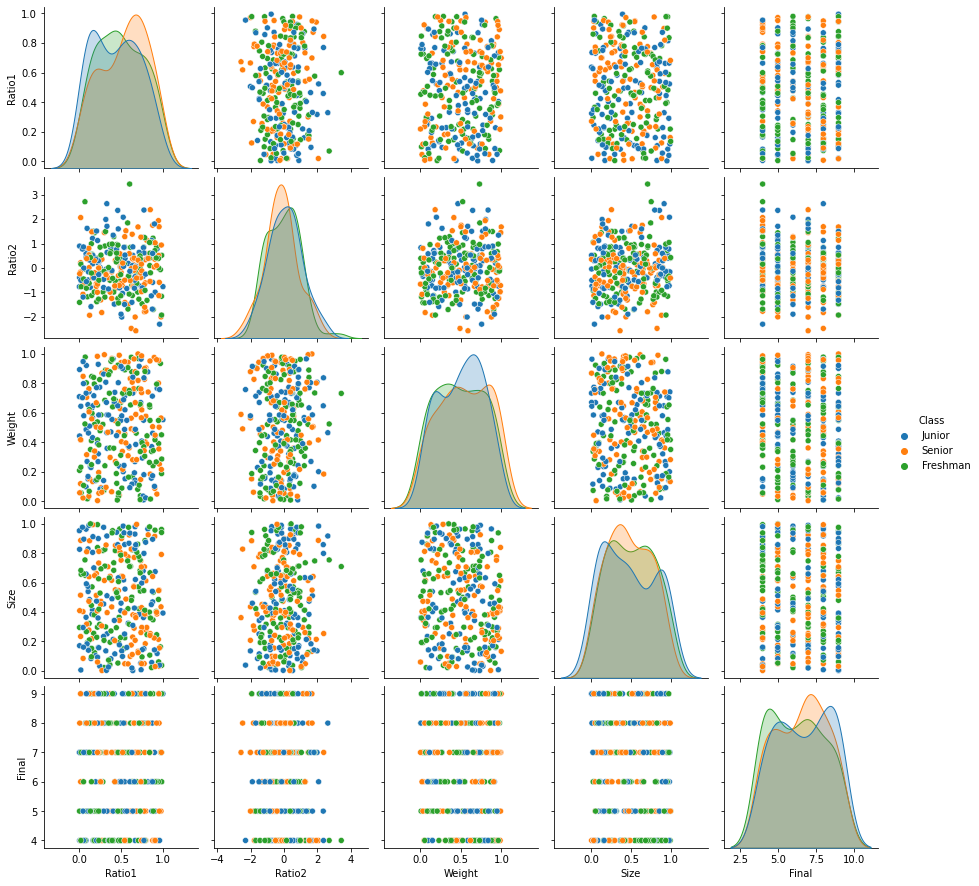

In [87]:
sn.pairplot(df, hue="Class")
plt.show()

### Scatterplot

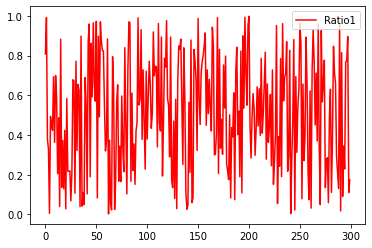

In [20]:
df[['Ratio1']].plot(color = 'red')
plt.show()

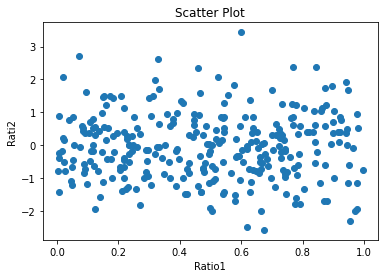

In [61]:
plt.scatter(df['Ratio1'], df['Ratio2'])
plt.title("Scatter Plot")
  
# Setting the X and Y labels
plt.xlabel('Ratio1')
plt.ylabel('Rati2')
  
plt.show()


### Barplot

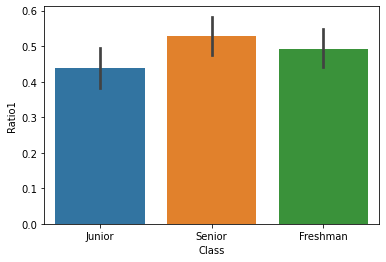

In [86]:
sn.barplot(x = 'Class', y = 'Ratio1', data = df)
plt.show()

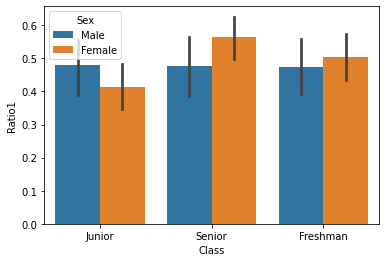

In [88]:
sn.barplot(x = 'Class', y = 'Ratio1', hue = 'Sex', data = df)
plt.show()

### Histogram

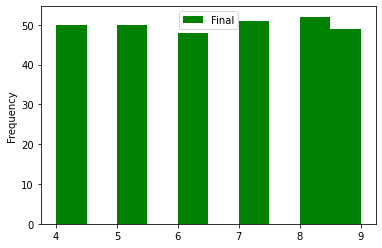

In [19]:
df[['Final']].plot(kind = 'hist', color = 'green')
plt.show()

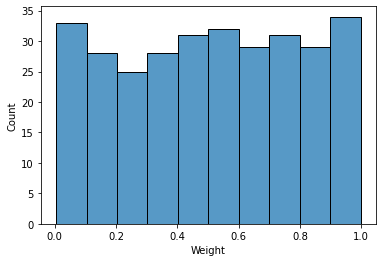

In [97]:
sn.histplot(x = 'Weight', data = df)
plt.show()

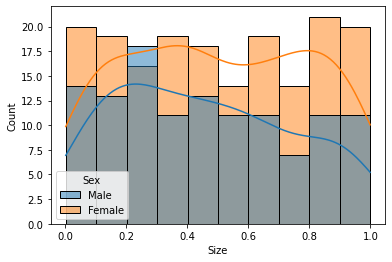

In [95]:
sn.histplot(x='Size', data=df, kde=True, hue='Sex')
plt.show()

### Boxplot & Catplot

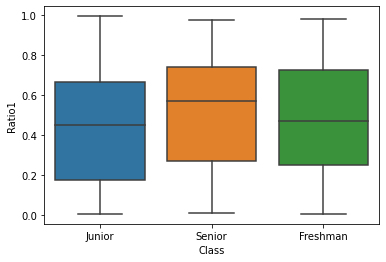

In [92]:
sn.boxplot(x = 'Class', y = 'Ratio1', data = df)
plt.show()

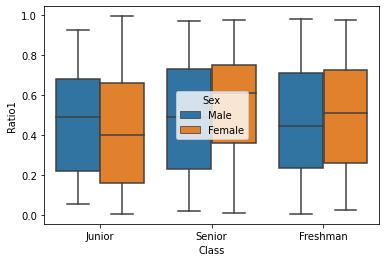

In [93]:
sn.boxplot(x = 'Class', y = 'Ratio1', hue = 'Sex', data = df)
plt.show()

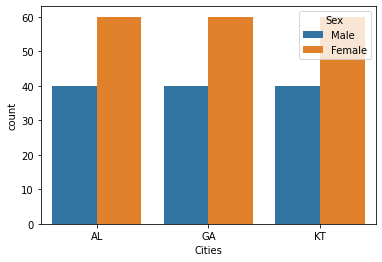

In [94]:
sn.countplot(x = 'Cities', hue = 'Sex', data = df)
plt.show()

### Stem Leaf Plot

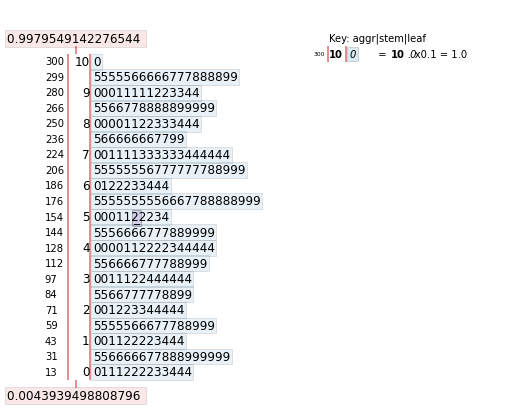

In [114]:
import stemgraphic 
fig, ax = stemgraphic.stem_graphic(df['Weight'])

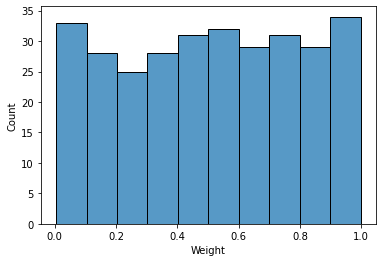

In [128]:
sn.histplot(x='Weight', data=df)
plt.show()

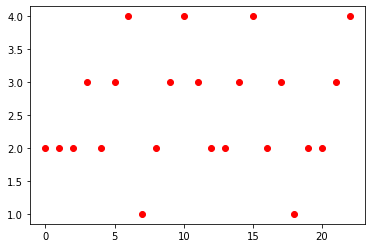

In [126]:
plt.plot([2,2,2,3,2,3,4,1,2,3,4,3,2,2,3,4,2,3,1,2,2,3,4], 'ro')
plt.show()

### Pivot Tables

In [13]:
pivot_table = df.groupby('Class')
pivot_table[['Size', 'Weight', 'Ratio1']].mean()


,Size,Weight,Ratio1
Class,,,
Freshman,0.494766,0.542568,0.465855
Junior,0.547693,0.542523,0.529080
Senior,0.475973,0.505777,0.526412


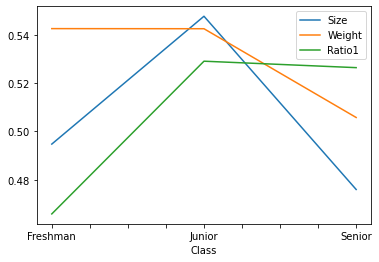

In [12]:
pivot_table[['Size', 'Weight', 'Ratio1']].mean().plot()
plt.show()

In [15]:
pivot_table.get_group('Freshman')

,Ratio1,Ratio2,Cities,Weight,Sex,Size,Class,Final
2,0.378830,-1.285383,KT,0.978259,Female,0.891156,Freshman,9
5,0.493010,-0.222497,KT,0.312811,Male,0.362773,Freshman,5
8,0.693517,-0.636721,KT,0.919775,Female,0.149144,Freshman,5
11,0.588846,0.333557,KT,0.291664,Female,0.313693,Freshman,6
14,0.039944,0.455208,KT,0.759083,Male,0.696884,Freshman,9
...,...,...,...,...,...,...,...,...
287,0.210511,1.329984,KT,0.647586,Female,0.022008,Freshman,8
290,0.017551,-1.141293,KT,0.283977,Male,0.775261,Freshman,7
293,0.344022,-0.470640,KT,0.638949,Female,0.926002,Freshman,6
296,0.774055,-0.258905,KT,0.835476,Female,0.748544,Freshman,8


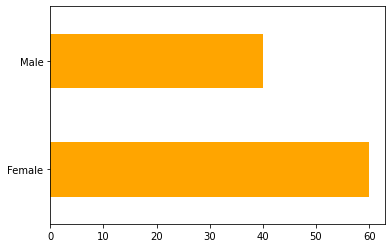

In [18]:
pivot_table.get_group('Senior')['Sex'].value_counts().plot(kind = 'barh', color = 'orange')
plt.show()

In [45]:
df[['Ratio1','Ratio2']].agg(['median', 'mean', 'max', 'sum']).plot(kind = 'barh')

,Ratio1,Ratio2
median,0.507161,-0.107330
mean,0.507116,-0.095387
max,0.998703,3.625908
sum,152.134690,-28.615970


In [44]:
np.average(df['Ratio1'])

0.5071156334813883